# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 2/13/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 2/13/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,8493,38928341,21.8
Albania,12267,2877800,426.3
Algeria,10978,43851043,25.0
Andorra,1584,77265,2050.1
Angola,438,32866268,1.3
Antarctica,0,0,NaN
Antigua and Barbuda,773,97928,789.4
Argentina,399367,45195777,883.6
Armenia,39946,2963234,1348.1


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Winter Olympics 2022,290,0,inf
Denmark,624287,5837213,10694.9
Palau,1655,18008,9190.4
Netherlands,1416701,17134873,8267.9
Georgia,291292,3989175,7302.1
Slovenia,145576,2078932,7002.4
Israel,595942,8655541,6885.1
Latvia,129633,1886202,6872.7
Estonia,88024,1326539,6635.6


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

2/9/22     11832331.0
2/10/22    12068411.0
2/11/22    12274653.0
2/12/22    12391463.0
2/13/22    12454304.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

1/31/22         NaN
2/1/22     211277.0
2/2/22     238252.0
2/3/22     248652.0
2/4/22     214386.0
2/5/22     127116.0
2/6/22      82363.0
2/7/22      51377.0
2/8/22     380632.0
2/9/22     252813.0
2/10/22    236080.0
2/11/22    206242.0
2/12/22    116810.0
2/13/22     62841.0
Name: Germany, dtype: float64

<AxesSubplot:>

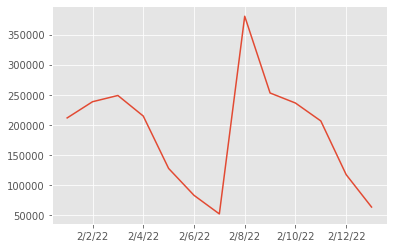

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2920.8587511680444